In [2]:
from PIL import Image
from transformers import AutoProcessor, LlavaForConditionalGeneration

In [3]:
model = LlavaForConditionalGeneration.from_pretrained("llava-hf/llava-1.5-7b-hf")
processor = AutoProcessor.from_pretrained("llava-hf/llava-1.5-7b-hf")

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


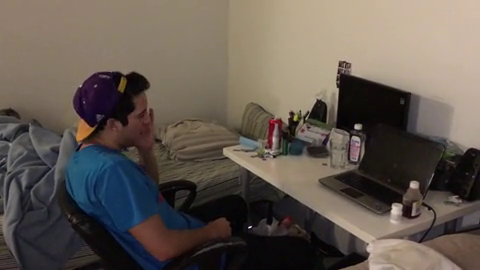

In [16]:
prompt = "<image>\nFind important positional relations among only these objects: box,pillow,blanket,table,person,bed,bottle,clothes,phone,sofa,television,chair,laptop\nASSISTANT:"
url = "../../YG001/000089.png"
image = Image.open(url)

inputs = processor(text=prompt, images=image, return_tensors="pt")
image

In [24]:
# Generate
generate_ids = model.generate(**inputs, max_length=512, temperature=0.1, top_p=0.7, do_sample=True)

In [25]:
processor.batch_decode(generate_ids, skip_special_tokens=True, clean_up_token0104zation_spaces=False)[0]

'\nFind important positional relations among only these objects: box,pillow,blanket,table,person,bed,bottle,clothes,phone,sofa,television,chair,laptop\nASSISTANT: The person is sitting in a chair in front of a table with a laptop on it. The table is located next to a bed, and there is a pillow and blanket on the bed. A bottle is also present on the table. The person is holding a phone, and there is a television in the room. The chair is positioned in front of the table, and a sofa is located nearby.'

In [ ]:
model = LlavaForConditionalGeneration.from_pretrained("llava-hf/llava-1.5-13b-hf")
processor = AutoProcessor.from_pretrained("llava-hf/llava-1.5-13b-hf")